In [7]:
!pip install -U fastai

In [9]:
from fastai.vision.all import *

In [11]:
folder = Path('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset')
folder.ls()

(#3) [Path('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data'),Path('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/training_data'),Path('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/validation_data')]

In [12]:
fns = get_image_files(folder)
corrupted = verify_images(fns)
print(len(corrupted), " corrupted files found")

if len(corrupted) > 0:
    corrupted.map(Path.unlink)

0  corrupted files found


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


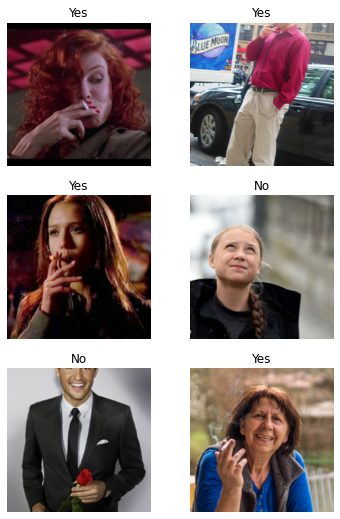

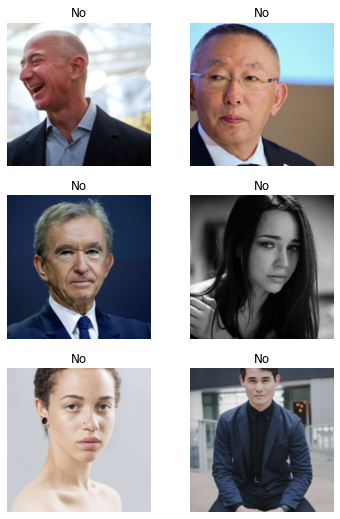

In [13]:
def smoking_(x):
  return 'Yes' if parent_label(x)=='smoking' else 'No'
  
image_set = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,         
    splitter=GrandparentSplitter(train_name='training_data', valid_name='validation_data'),
    get_y=smoking_,                                        
    item_tfms=Resize(224))

dls = image_set.dataloaders(folder)                         

dls.train.show_batch(max_n=6, nrows=3)  
dls.valid.show_batch(max_n=6, nrows=3)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\user\miniconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


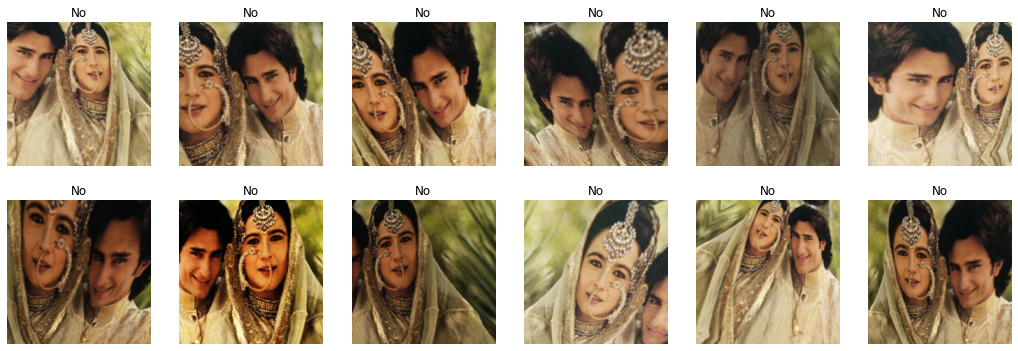

In [14]:
image_set = image_set.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2, do_flip=True, p_affine=0.75, max_rotate=10, min_scale=0.5)
)

dls = image_set.dataloaders(folder)
dls.show_batch(max_n=12, nrows=2, unique=True)

In [15]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

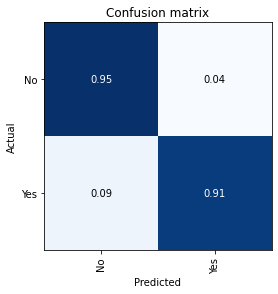

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize='all')

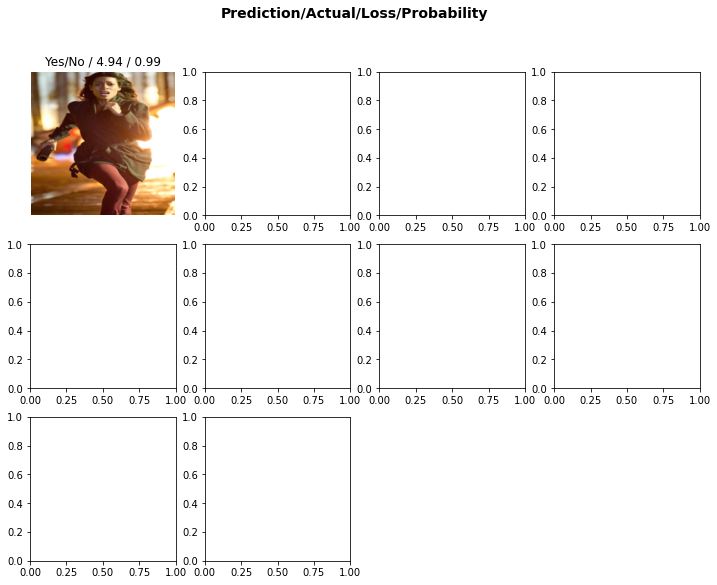

In [27]:
interp.plot_top_losses(10, nrows=3)

In [97]:
from IPython import display

('No', TensorBase(0), TensorBase([9.9994e-01, 6.4642e-05]))


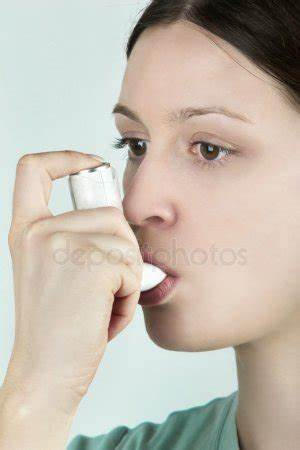

In [103]:
img1 = ('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data/abc231.jpg')
print(learn.predict(img1))
display.Image(img1)

('No', TensorBase(0), TensorBase([1.0000e+00, 1.0920e-06]))


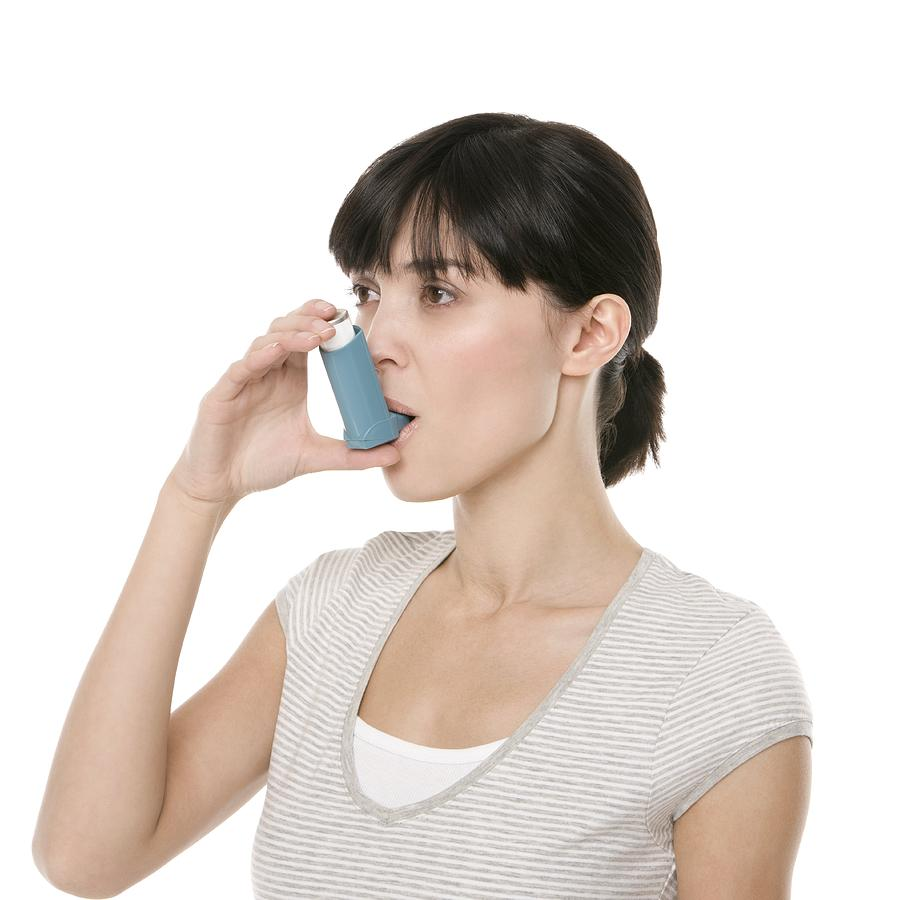

In [102]:
img2 = ('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data/abc234.jpg')
print(learn.predict(img2))
display.Image(img2)

('Yes', TensorBase(1), TensorBase([0.0075, 0.9925]))


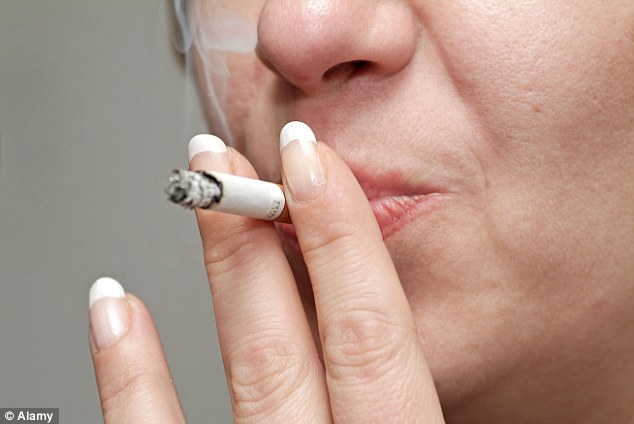

In [101]:
img3 = ('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data/abc039.jpg')
print(learn.predict(img3))
display.Image(img3)

('No', TensorBase(0), TensorBase([9.9973e-01, 2.7386e-04]))


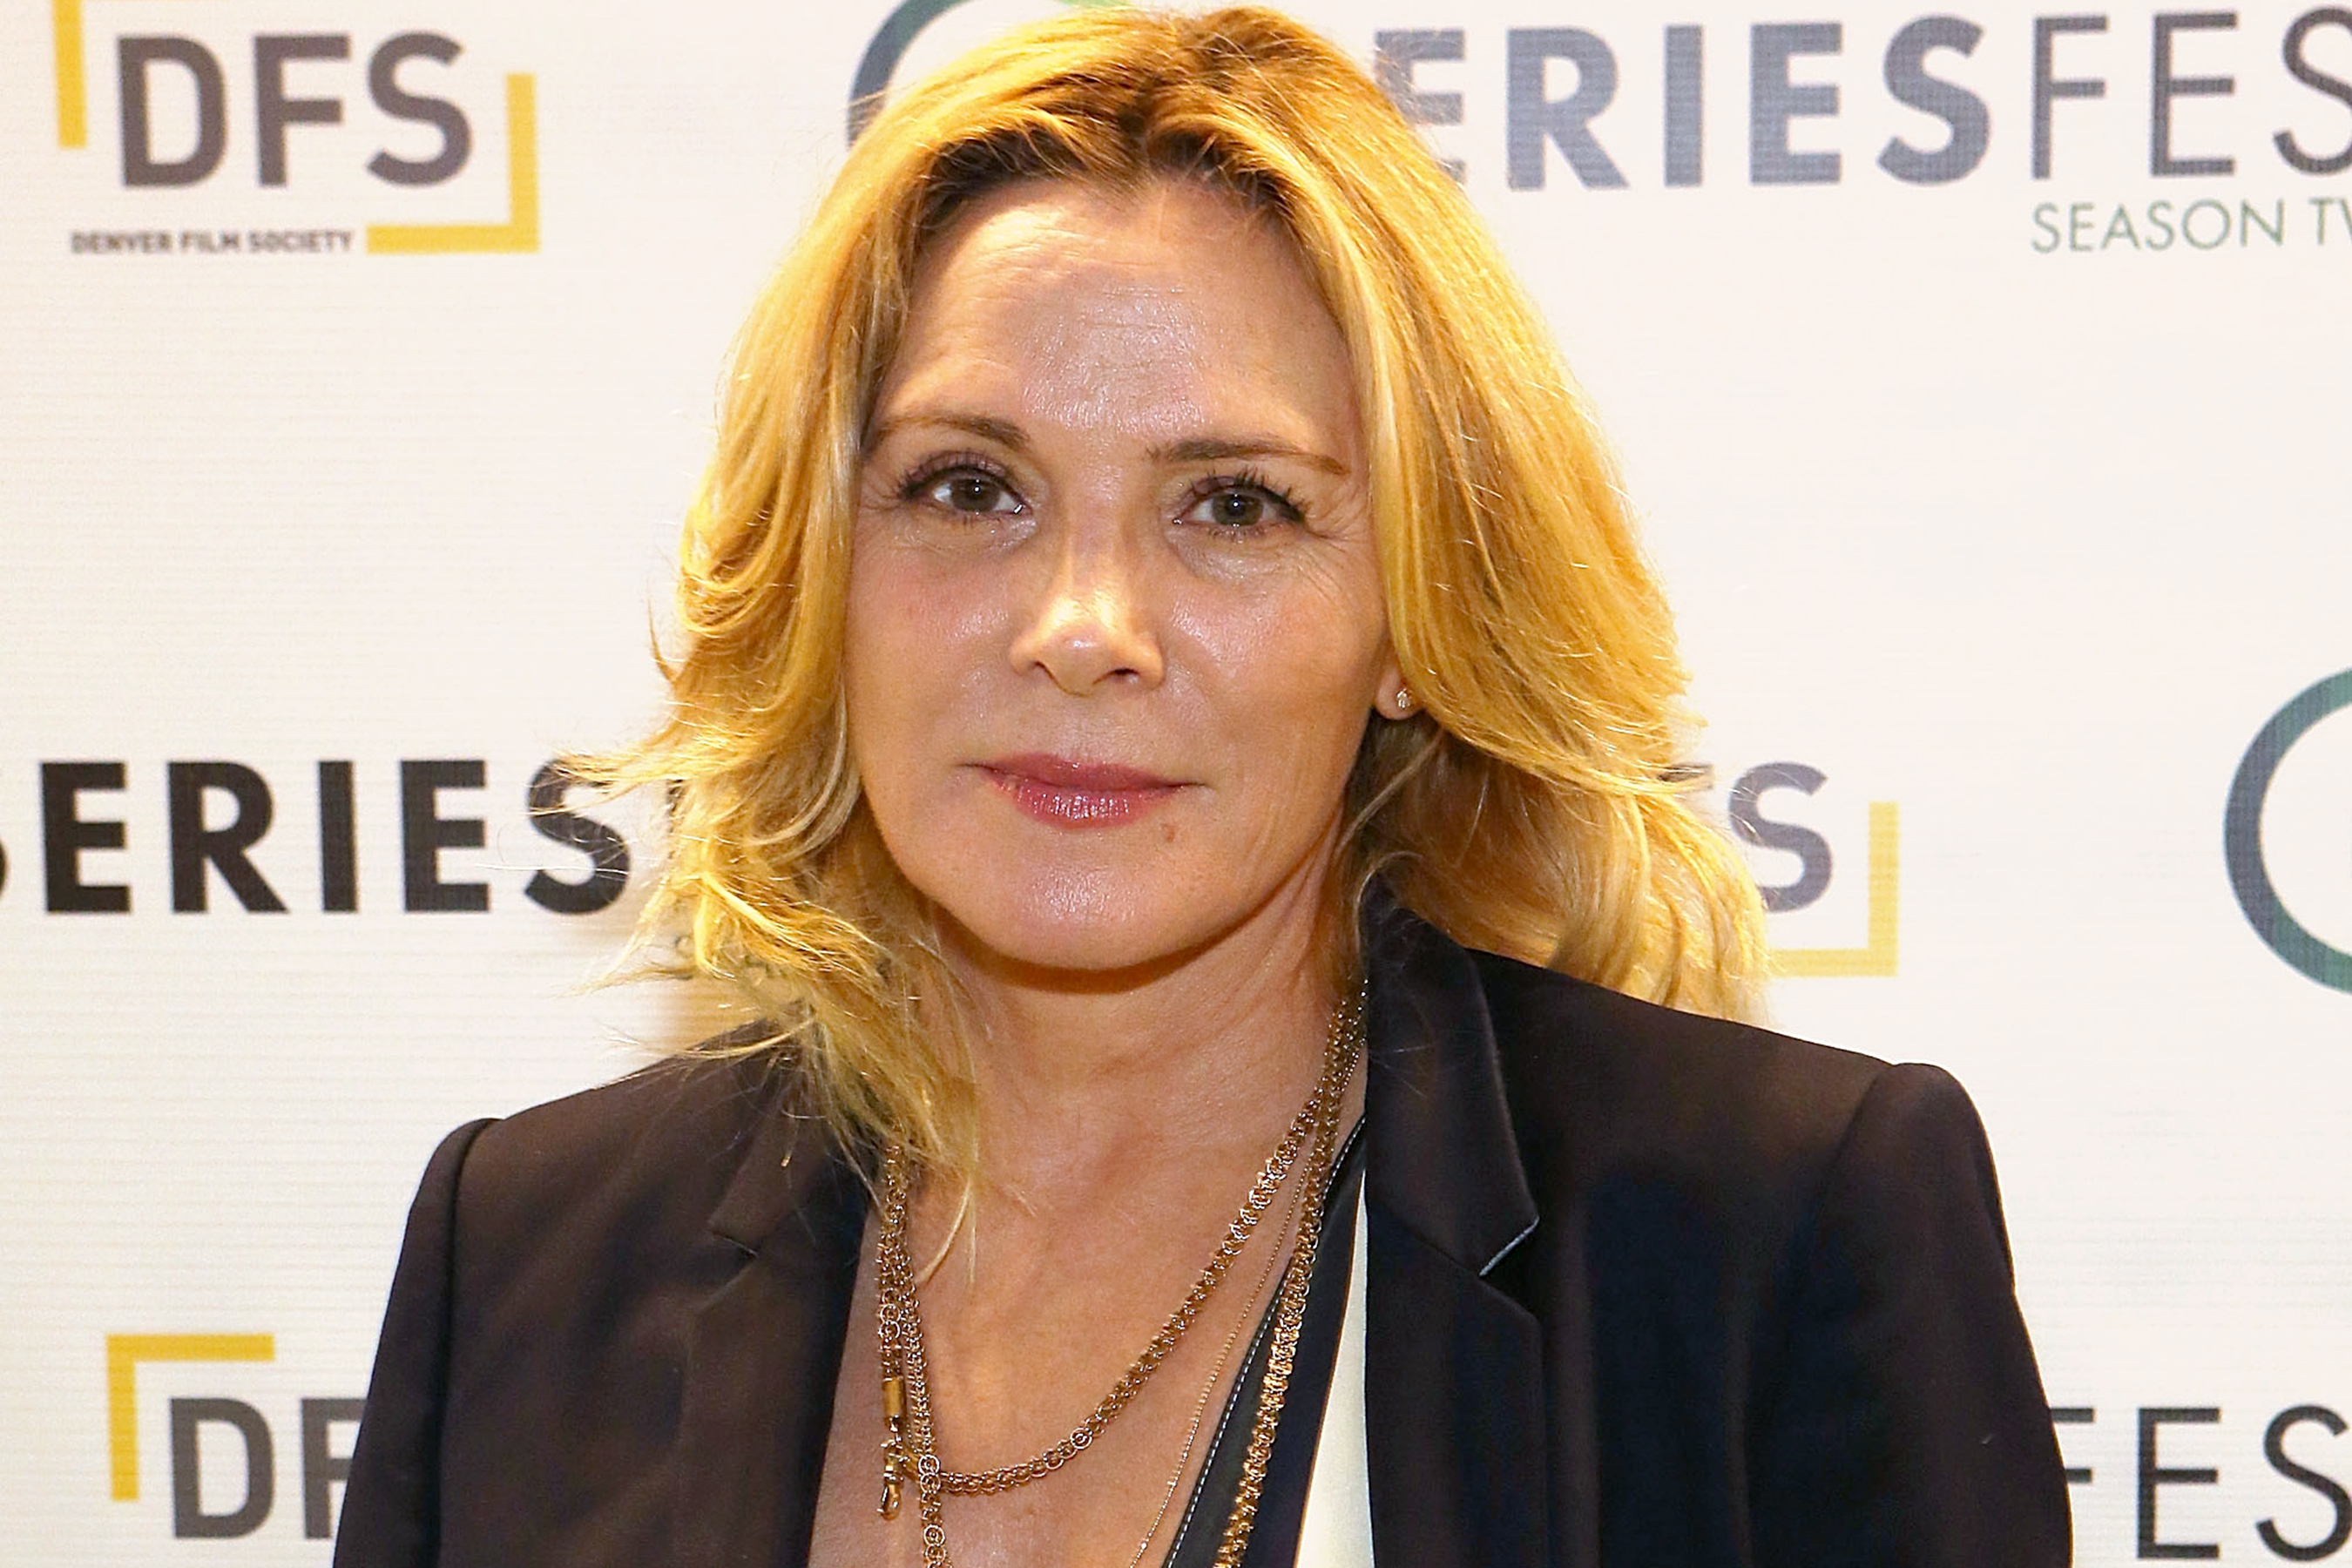

In [100]:
img4 = ('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data/abc329.jpg')
print(learn.predict(img4))
display.Image(img4)

('Yes', TensorBase(1), TensorBase([0.1678, 0.8322]))


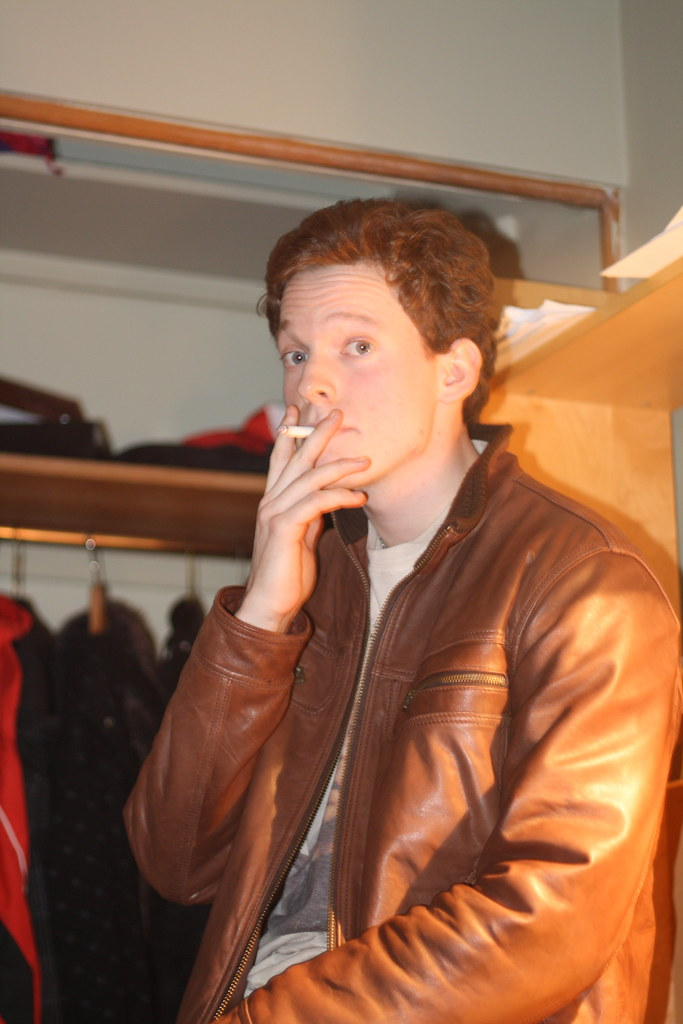

In [98]:
img5 = ('C:/Users/user/Desktop/AI/smokingVSnotsmoking/dataset/testing_data/abc050.jpg')
print(learn.predict(img5))
display.Image(img5)